# Chapter 3: Statistical Foundations

This notebook covers the essential statistical concepts for machine learning:
- **Histograms & Probability** - Understanding data distribution
- **Discrete Distributions** - Binomial and Poisson
- **Continuous Distributions** - Normal, Exponential, Uniform
- **Models & Residuals** - Measuring prediction errors
- **SSR, MSE, R²** - Quantifying model performance
- **p-values** - Statistical significance

Let's explore each concept with real examples!

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import binom, poisson, norm, expon, uniform
import warnings
warnings.filterwarnings('ignore')

## 2. Histograms and Probability

**The Problem**: Natural variation in data (you don't get the same number of french fries each time!)

**Solution**: Use histograms to see patterns and calculate probabilities.

**Formula**: $P(\text{value in bin}) = \frac{\text{observations in bin}}{\text{total observations}}$

**Weaknesses**:
- Sensitive to bin width (too wide = low precision, too narrow = gaps)
- Cannot predict values in gaps where no data exists

EXAMPLE: Number of French Fries in Each Order

Collected 200 orders
Sample data: [52 49 53 57 48 48 57 53 47 52]



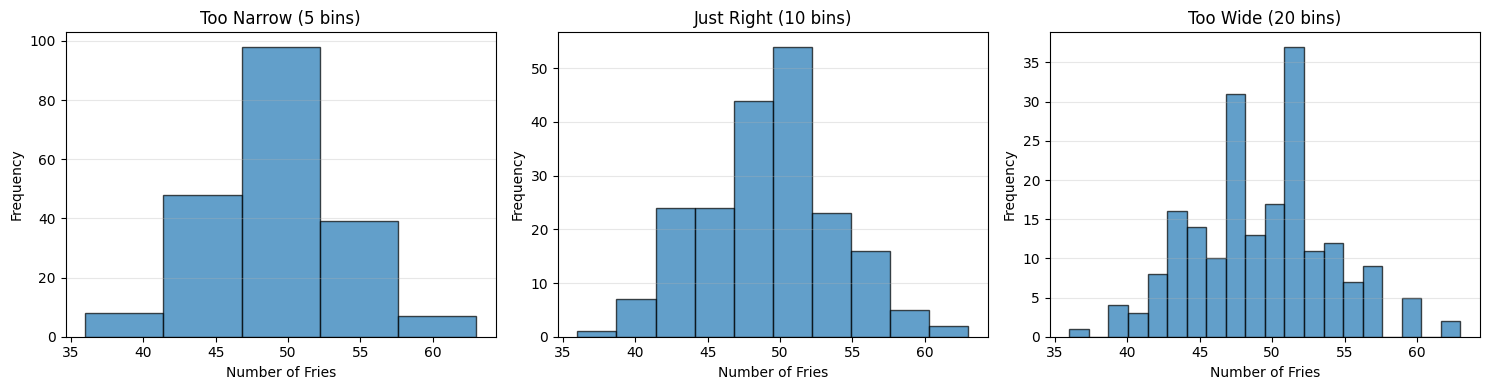

CALCULATING PROBABILITY:
Total observations: 200

Orders with 45-49 fries: 68
Probability = 68/200 = 0.340 or 34.0%

Orders with 50-54 fries: 77
Probability = 77/200 = 0.385 or 38.5%

⚠️  WEAKNESS: What if no one ordered exactly 60 fries? We have a gap!
   Histogram can't predict probability for that gap.


In [2]:
print("EXAMPLE: Number of French Fries in Each Order\n")

# Simulate data: french fries count varies naturally
np.random.seed(42)
fries_data = np.random.normal(50, 5, 200).astype(int)

print(f"Collected {len(fries_data)} orders")
print(f"Sample data: {fries_data[:10]}\n")

# Create histogram
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Different bin widths
bin_settings = [5, 10, 20]
titles = ['Too Narrow (5 bins)', 'Just Right (10 bins)', 'Too Wide (20 bins)']

for ax, bins, title in zip(axes, bin_settings, titles):
    counts, edges, patches = ax.hist(fries_data, bins=bins, edgecolor='black', alpha=0.7)
    ax.set_xlabel('Number of Fries')
    ax.set_ylabel('Frequency')
    ax.set_title(title)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Calculate probabilities
print("CALCULATING PROBABILITY:")
print(f"Total observations: {len(fries_data)}\n")

# Probability of getting 45-50 fries
count_45_50 = np.sum((fries_data >= 45) & (fries_data < 50))
prob_45_50 = count_45_50 / len(fries_data)

print(f"Orders with 45-49 fries: {count_45_50}")
print(f"Probability = {count_45_50}/{len(fries_data)} = {prob_45_50:.3f} or {prob_45_50*100:.1f}%")

# Probability of getting 50-55 fries
count_50_55 = np.sum((fries_data >= 50) & (fries_data < 55))
prob_50_55 = count_50_55 / len(fries_data)

print(f"\nOrders with 50-54 fries: {count_50_55}")
print(f"Probability = {count_50_55}/{len(fries_data)} = {prob_50_55:.3f} or {prob_50_55*100:.1f}%")

print("\n⚠️  WEAKNESS: What if no one ordered exactly 60 fries? We have a gap!")
print("   Histogram can't predict probability for that gap.")

## 3. Discrete Probability Distributions

**Solution to gaps**: Use mathematical distributions to approximate data!

**Discrete Data**: Countable values only (Yes/No, 1, 2, 3)

### 3.1 Binomial Distribution

For **binary outcomes** (Heads/Tails, Yes/No, Success/Fail)

**Formula**: $P(X = x) = \binom{n}{x} p^x (1-p)^{n-x}$

Where:
- $n$ = number of attempts/trials
- $p$ = probability of success
- $x$ = number of successes
- $\binom{n}{x}$ = combinations (all possible ways to get x successes)

BINOMIAL DISTRIBUTION

EXAMPLE: Flipping a coin 10 times
What's the probability of getting exactly 2 Heads?

Parameters:
  n (trials) = 10
  p (success probability) = 0.5
  x (successes we want) = 2

P(X = 2) = 0.0439 or 4.39%

REAL-WORLD EXAMPLE: Customer Purchases
30% of customers buy after seeing an ad
We show ads to 20 customers

P(exactly 5 buy) = 0.1789 or 17.89%
P(5 or more buy) = 0.7625 or 76.25%



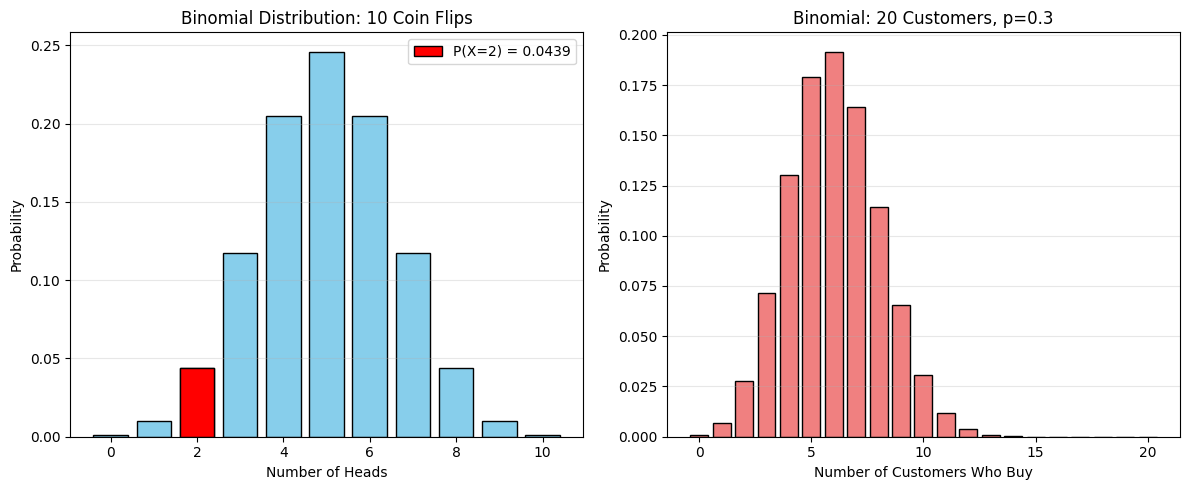

In [3]:
print("="*60)
print("BINOMIAL DISTRIBUTION")
print("="*60)
print("\nEXAMPLE: Flipping a coin 10 times")
print("What's the probability of getting exactly 2 Heads?\n")

# Parameters
n = 10  # number of coin flips
p = 0.5  # probability of heads
x = 2   # we want exactly 2 heads

# Calculate using binomial formula
prob_2_heads = binom.pmf(x, n, p)

print(f"Parameters:")
print(f"  n (trials) = {n}")
print(f"  p (success probability) = {p}")
print(f"  x (successes we want) = {x}\n")

print(f"P(X = 2) = {prob_2_heads:.4f} or {prob_2_heads*100:.2f}%\n")

# Show full distribution
x_values = range(0, n+1)
probabilities = [binom.pmf(x, n, p) for x in x_values]

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(x_values, probabilities, color='skyblue', edgecolor='black')
plt.bar(2, prob_2_heads, color='red', edgecolor='black', label=f'P(X=2) = {prob_2_heads:.4f}')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.title('Binomial Distribution: 10 Coin Flips')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Real world example
print("REAL-WORLD EXAMPLE: Customer Purchases")
print("30% of customers buy after seeing an ad")
print("We show ads to 20 customers\n")

n_customers = 20
p_buy = 0.3

# What's probability exactly 5 buy?
prob_5_buy = binom.pmf(5, n_customers, p_buy)
print(f"P(exactly 5 buy) = {prob_5_buy:.4f} or {prob_5_buy*100:.2f}%")

# What's probability 5 or more buy?
prob_5_or_more = 1 - binom.cdf(4, n_customers, p_buy)
print(f"P(5 or more buy) = {prob_5_or_more:.4f} or {prob_5_or_more*100:.2f}%\n")

plt.subplot(1, 2, 2)
x_cust = range(0, n_customers+1)
probs_cust = [binom.pmf(x, n_customers, p_buy) for x in x_cust]
plt.bar(x_cust, probs_cust, color='lightcoral', edgecolor='black')
plt.xlabel('Number of Customers Who Buy')
plt.ylabel('Probability')
plt.title(f'Binomial: 20 Customers, p={p_buy}')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 3.2 Poisson Distribution

For **counts over time/space** (pages read per hour, emails per day)

**Formula**: $P(X = x) = \frac{\lambda^x e^{-\lambda}}{x!}$

Where:
- $\lambda$ (lambda) = average rate
- $x$ = number of events
- $e$ = Euler's number (≈ 2.718)

POISSON DISTRIBUTION

EXAMPLE: Pages read per hour (average = 3 pages)

λ (lambda) = 3 pages/hour

P(exactly 2 pages) = 0.2240 or 22.40%
P(exactly 5 pages) = 0.1008 or 10.08%

REAL-WORLD EXAMPLE: Website Visits
Average = 8 visits per minute

P(exactly 10 visits) = 0.0993 or 9.93%
P(more than 12 visits) = 0.0638 or 6.38%



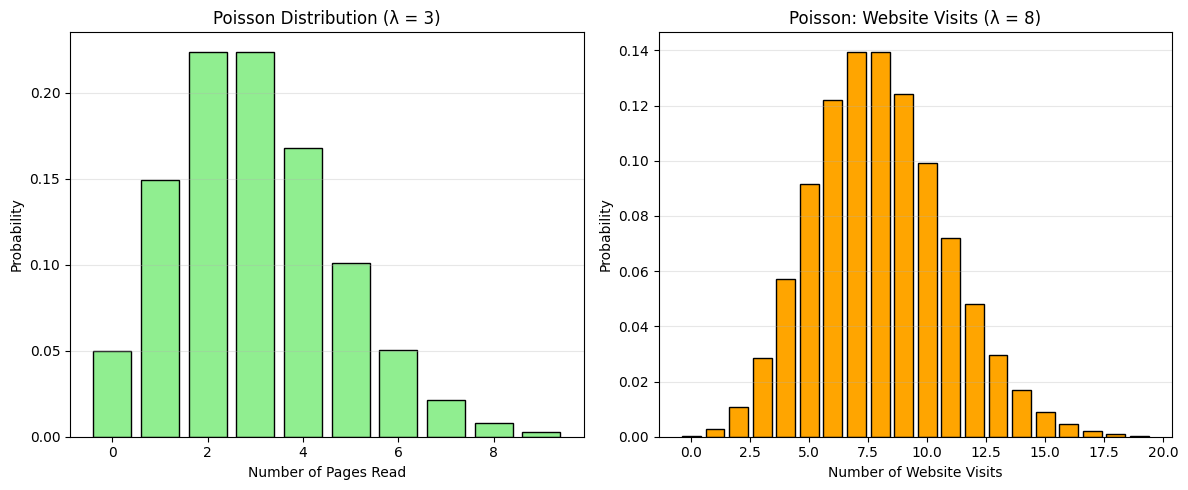

✅ Poisson is perfect for counting events over time/space!


In [4]:
print("="*60)
print("POISSON DISTRIBUTION")
print("="*60)
print("\nEXAMPLE: Pages read per hour (average = 3 pages)\n")

# Parameter
lambda_rate = 3  # average pages per hour

print(f"λ (lambda) = {lambda_rate} pages/hour\n")

# Calculate probabilities for different values
x_pages = range(0, 10)
probs_pages = [poisson.pmf(x, lambda_rate) for x in x_pages]

# Specific examples
prob_2_pages = poisson.pmf(2, lambda_rate)
prob_5_pages = poisson.pmf(5, lambda_rate)

print(f"P(exactly 2 pages) = {prob_2_pages:.4f} or {prob_2_pages*100:.2f}%")
print(f"P(exactly 5 pages) = {prob_5_pages:.4f} or {prob_5_pages*100:.2f}%\n")

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(x_pages, probs_pages, color='lightgreen', edgecolor='black')
plt.xlabel('Number of Pages Read')
plt.ylabel('Probability')
plt.title(f'Poisson Distribution (λ = {lambda_rate})')
plt.grid(True, alpha=0.3, axis='y')

# Real world example
print("REAL-WORLD EXAMPLE: Website Visits")
print("Average = 8 visits per minute\n")

lambda_visits = 8
x_visits = range(0, 20)
probs_visits = [poisson.pmf(x, lambda_visits) for x in x_visits]

prob_10_visits = poisson.pmf(10, lambda_visits)
print(f"P(exactly 10 visits) = {prob_10_visits:.4f} or {prob_10_visits*100:.2f}%")

# More than 12 visits
prob_more_12 = 1 - poisson.cdf(12, lambda_visits)
print(f"P(more than 12 visits) = {prob_more_12:.4f} or {prob_more_12*100:.2f}%\n")

plt.subplot(1, 2, 2)
plt.bar(x_visits, probs_visits, color='orange', edgecolor='black')
plt.xlabel('Number of Website Visits')
plt.ylabel('Probability')
plt.title(f'Poisson: Website Visits (λ = {lambda_visits})')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✅ Poisson is perfect for counting events over time/space!")

## 4. Continuous Probability Distributions

**Continuous Data**: Measurable with infinite precision (height, weight, time)

### 4.1 Normal (Gaussian) Distribution - The Bell Curve

**Formula**: $f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$

Where:
- $\mu$ (mu) = mean (center)
- $\sigma$ (sigma) = standard deviation (width)

**CRITICAL CONCEPT**: 
- Y-axis = **Likelihood** (NOT probability!)
- Probability = **Area Under the Curve** between two points
- P(exact value) = 0 (a point has no width!)

NORMAL (GAUSSIAN) DISTRIBUTION

EXAMPLE: Human Heights (cm)

μ (mean) = 170 cm
σ (standard deviation) = 10 cm

⚠️  CRITICAL: Y-axis is LIKELIHOOD, not probability!
    P(exactly 170.0000... cm) = 0 (infinite precision)
    We calculate probability as AREA between two points:

P(165 < height < 175) = Area under curve
                      = 0.3829 or 38.29%


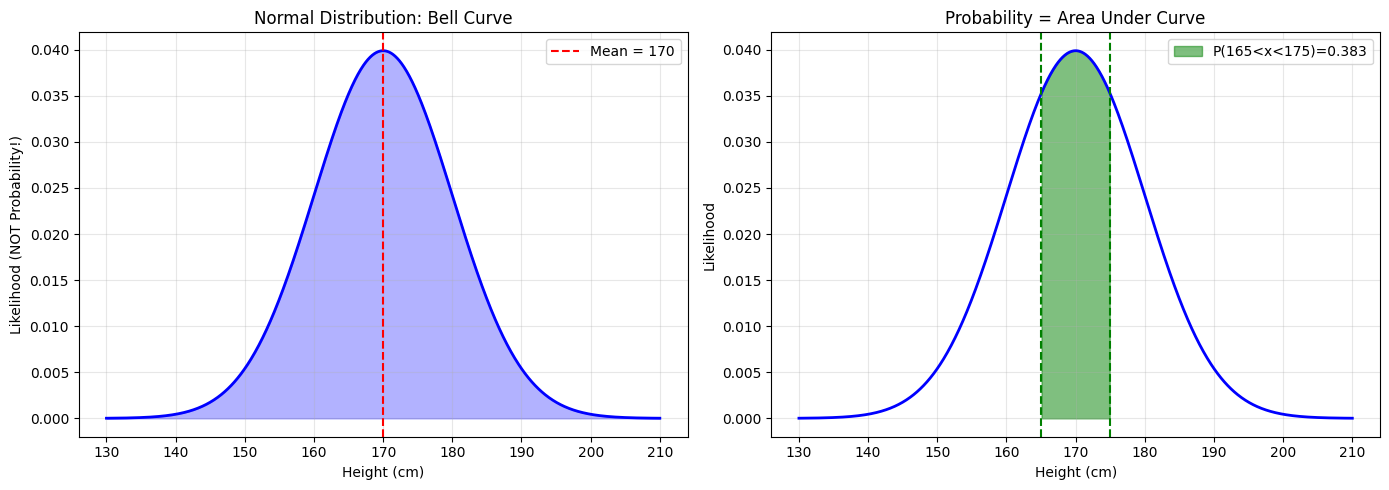


MORE EXAMPLES:
P(160 < height < 180) = 0.6827 or 68.27%
P(height < 160) = 0.1587 or 15.87%
P(height > 180) = 0.1587 or 15.87%


In [5]:
print("="*60)
print("NORMAL (GAUSSIAN) DISTRIBUTION")
print("="*60)
print("\nEXAMPLE: Human Heights (cm)\n")

# Parameters
mu = 170  # mean height
sigma = 10  # standard deviation

print(f"μ (mean) = {mu} cm")
print(f"σ (standard deviation) = {sigma} cm\n")

# Create x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y, linewidth=2, color='blue')
plt.fill_between(x, y, alpha=0.3, color='blue')
plt.xlabel('Height (cm)')
plt.ylabel('Likelihood (NOT Probability!)')
plt.title('Normal Distribution: Bell Curve')
plt.grid(True, alpha=0.3)
plt.axvline(mu, color='red', linestyle='--', label=f'Mean = {mu}')
plt.legend()

print("⚠️  CRITICAL: Y-axis is LIKELIHOOD, not probability!")
print("    P(exactly 170.0000... cm) = 0 (infinite precision)")
print("    We calculate probability as AREA between two points:\n")

# Calculate area under curve (probability)
# P(165 < height < 175)
prob_165_175 = norm.cdf(175, mu, sigma) - norm.cdf(165, mu, sigma)
print(f"P(165 < height < 175) = Area under curve")
print(f"                      = {prob_165_175:.4f} or {prob_165_175*100:.2f}%")

# Visualize the area
plt.subplot(1, 2, 2)
plt.plot(x, y, linewidth=2, color='blue')
x_fill = x[(x >= 165) & (x <= 175)]
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, alpha=0.5, color='green', label=f'P(165<x<175)={prob_165_175:.3f}')
plt.xlabel('Height (cm)')
plt.ylabel('Likelihood')
plt.title('Probability = Area Under Curve')
plt.grid(True, alpha=0.3)
plt.axvline(165, color='green', linestyle='--')
plt.axvline(175, color='green', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

# More examples
print("\nMORE EXAMPLES:")
prob_160_180 = norm.cdf(180, mu, sigma) - norm.cdf(160, mu, sigma)
print(f"P(160 < height < 180) = {prob_160_180:.4f} or {prob_160_180*100:.2f}%")

prob_below_160 = norm.cdf(160, mu, sigma)
print(f"P(height < 160) = {prob_below_160:.4f} or {prob_below_160*100:.2f}%")

prob_above_180 = 1 - norm.cdf(180, mu, sigma)
print(f"P(height > 180) = {prob_above_180:.4f} or {prob_above_180*100:.2f}%")

### 4.2 Other Continuous Distributions

**Exponential**: Time between events  
**Uniform**: Every value equally likely (random number generation)

EXPONENTIAL DISTRIBUTION
Use case: Time until next page turn

P(wait 2-4 minutes for next page) = 0.2325 or 23.25%

UNIFORM DISTRIBUTION
Use case: Random number generation (1-10)

P(value between 3 and 7) = (7-3)/(10-1) = 0.4444 or 44.44%


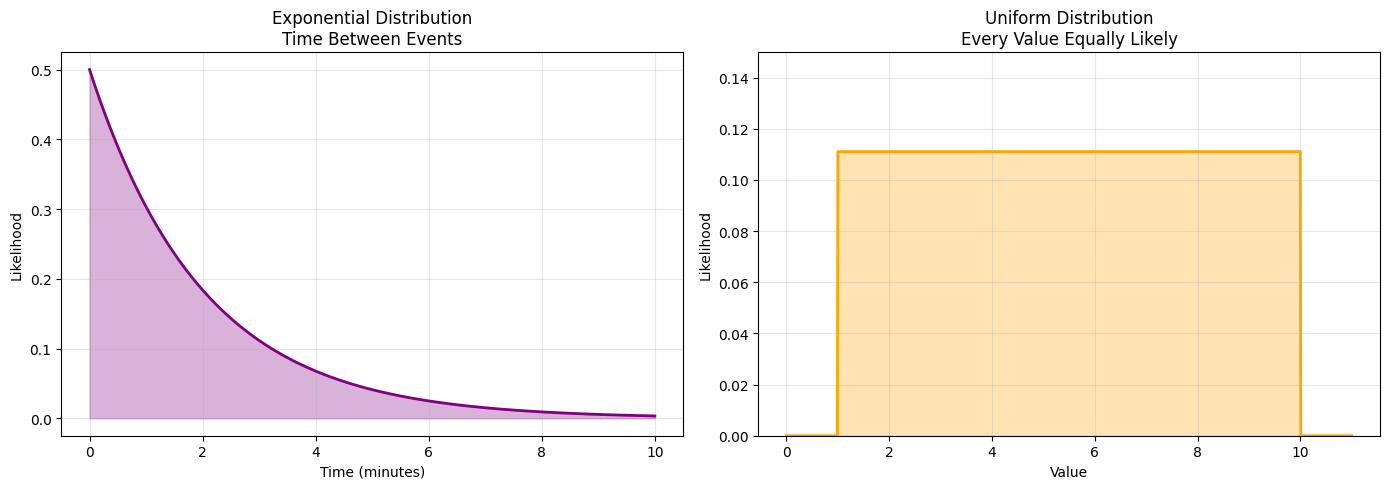


✅ Different distributions for different data types!


In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# EXPONENTIAL DISTRIBUTION
print("EXPONENTIAL DISTRIBUTION")
print("Use case: Time until next page turn\n")

lambda_exp = 0.5  # rate parameter
x_exp = np.linspace(0, 10, 1000)
y_exp = expon.pdf(x_exp, scale=1/lambda_exp)

axes[0].plot(x_exp, y_exp, linewidth=2, color='purple')
axes[0].fill_between(x_exp, y_exp, alpha=0.3, color='purple')
axes[0].set_xlabel('Time (minutes)')
axes[0].set_ylabel('Likelihood')
axes[0].set_title('Exponential Distribution\nTime Between Events')
axes[0].grid(True, alpha=0.3)

# Calculate probability
prob_wait_2_4 = expon.cdf(4, scale=1/lambda_exp) - expon.cdf(2, scale=1/lambda_exp)
print(f"P(wait 2-4 minutes for next page) = {prob_wait_2_4:.4f} or {prob_wait_2_4*100:.2f}%")

# UNIFORM DISTRIBUTION
print("\nUNIFORM DISTRIBUTION")
print("Use case: Random number generation (1-10)\n")

a, b = 1, 10  # range
x_unif = np.linspace(a-1, b+1, 1000)
y_unif = uniform.pdf(x_unif, a, b-a)

axes[1].plot(x_unif, y_unif, linewidth=2, color='orange')
axes[1].fill_between(x_unif, y_unif, alpha=0.3, color='orange')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Likelihood')
axes[1].set_title('Uniform Distribution\nEvery Value Equally Likely')
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim(0, 0.15)

# Calculate probability
prob_3_7 = (7-3)/(b-a)  # For uniform: P = (width of interval) / (total range)
print(f"P(value between 3 and 7) = (7-3)/(10-1) = {prob_3_7:.4f} or {prob_3_7*100:.2f}%")

plt.tight_layout()
plt.show()

print("\n✅ Different distributions for different data types!")

## 5. Models and Residuals

**Model**: An approximation of reality (like a line) used to make predictions

**Residual**: The vertical distance between observed and predicted values

**Formula**: $\text{Residual} = \text{Observed} - \text{Predicted}$

MODELS AND RESIDUALS

EXAMPLE: Predicting weight from height

Data and Predictions:
Height     Observed     Predicted    Residual  
--------------------------------------------------
150.0      76.49        75.84        0.65      
160.0      79.59        81.21        -1.63     
165.0      84.44        83.90        0.55      
170.0      89.57        86.58        2.99      
175.0      86.80        89.27        -2.47     
180.0      89.30        91.96        -2.66     
185.0      97.24        94.64        2.60      
190.0      97.30        97.33        -0.03     


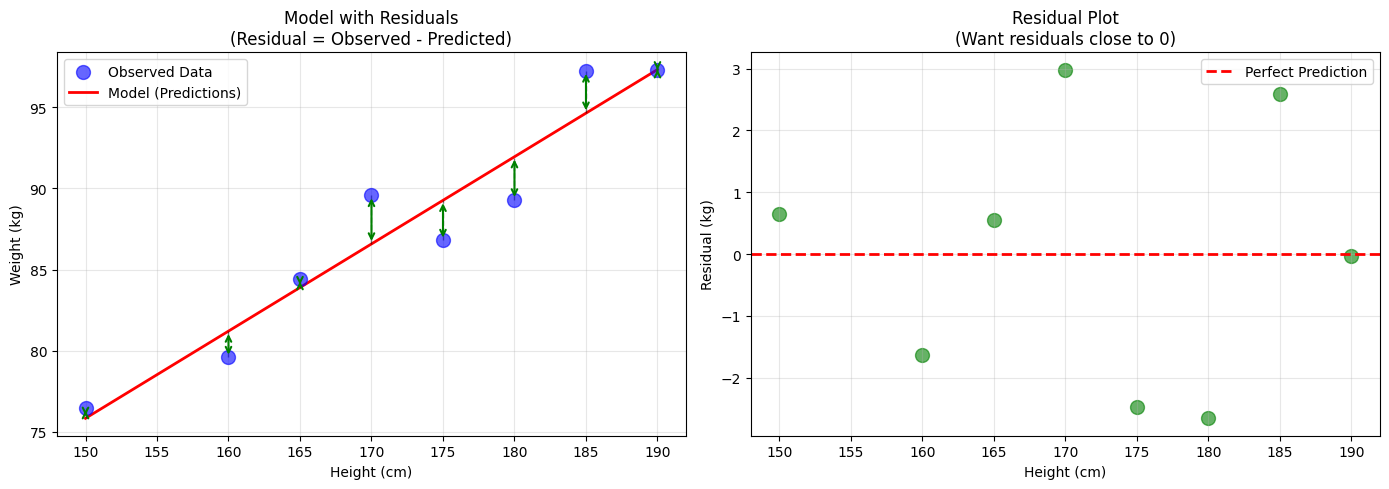


✅ Residuals show prediction errors
   Positive residual: Model underestimated
   Negative residual: Model overestimated


In [7]:
print("="*60)
print("MODELS AND RESIDUALS")
print("="*60)
print("\nEXAMPLE: Predicting weight from height\n")

# Create data
np.random.seed(42)
heights = np.array([150, 160, 165, 170, 175, 180, 185, 190])
weights = heights * 0.5 + np.random.normal(0, 3, len(heights))

# Fit a linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(heights.reshape(-1, 1), weights)

# Make predictions
predicted_weights = model.predict(heights.reshape(-1, 1))

# Calculate residuals
residuals = weights - predicted_weights

print("Data and Predictions:")
print(f"{'Height':<10} {'Observed':<12} {'Predicted':<12} {'Residual':<10}")
print("-" * 50)
for h, obs, pred, res in zip(heights, weights, predicted_weights, residuals):
    print(f"{h:<10.1f} {obs:<12.2f} {pred:<12.2f} {res:<10.2f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Model with residuals
axes[0].scatter(heights, weights, s=100, color='blue', alpha=0.6, label='Observed Data', zorder=3)
axes[0].plot(heights, predicted_weights, color='red', linewidth=2, label='Model (Predictions)', zorder=2)

# Draw residual lines
for h, obs, pred in zip(heights, weights, predicted_weights):
    axes[0].plot([h, h], [obs, pred], 'k--', alpha=0.5, linewidth=1)
    axes[0].annotate('', xy=(h, pred), xytext=(h, obs),
                    arrowprops=dict(arrowstyle='<->', color='green', lw=1.5))

axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Weight (kg)')
axes[0].set_title('Model with Residuals\n(Residual = Observed - Predicted)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right plot: Residuals
axes[1].scatter(heights, residuals, s=100, color='green', alpha=0.6)
axes[1].axhline(0, color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Residual (kg)')
axes[1].set_title('Residual Plot\n(Want residuals close to 0)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✅ Residuals show prediction errors")
print(f"   Positive residual: Model underestimated")
print(f"   Negative residual: Model overestimated")

## 6. Measuring Goodness: SSR & MSE

How do we quantify if a model is good?

**Sum of Squared Residuals (SSR)**: $\text{SSR} = \sum_{i=1}^{n} (\text{Observed}_i - \text{Predicted}_i)^2$

**Mean Squared Error (MSE)**: $\text{MSE} = \frac{\text{SSR}}{n}$

Why square? Makes all errors positive and penalizes large errors more!

SSR (Sum of Squared Residuals) & MSE

Calculating SSR and MSE:

Height     Observed     Predicted    Residual     Residual²   
-----------------------------------------------------------------
150.0      76.49        75.84        0.65         0.42        
160.0      79.59        81.21        -1.63        2.64        
165.0      84.44        83.90        0.55         0.30        
170.0      89.57        86.58        2.99         8.92        
175.0      86.80        89.27        -2.47        6.11        
180.0      89.30        91.96        -2.66        7.06        
185.0      97.24        94.64        2.60         6.74        
190.0      97.30        97.33        -0.03        0.00        

SSR (Sum of Squared Residuals) = 32.20
MSE (Mean Squared Error) = SSR / n = 32.20 / 8 = 4.02

COMPARING TWO MODELS

Model 1 (Fitted Line):
  SSR = 32.20
  MSE = 4.02

Model 2 (Just predict mean = 87.59):
  SSR = 392.05
  MSE = 49.01

✅ Lower SSR/MSE = Better model!
   Model 1 wins! (SSR: 32.20 < 392.0

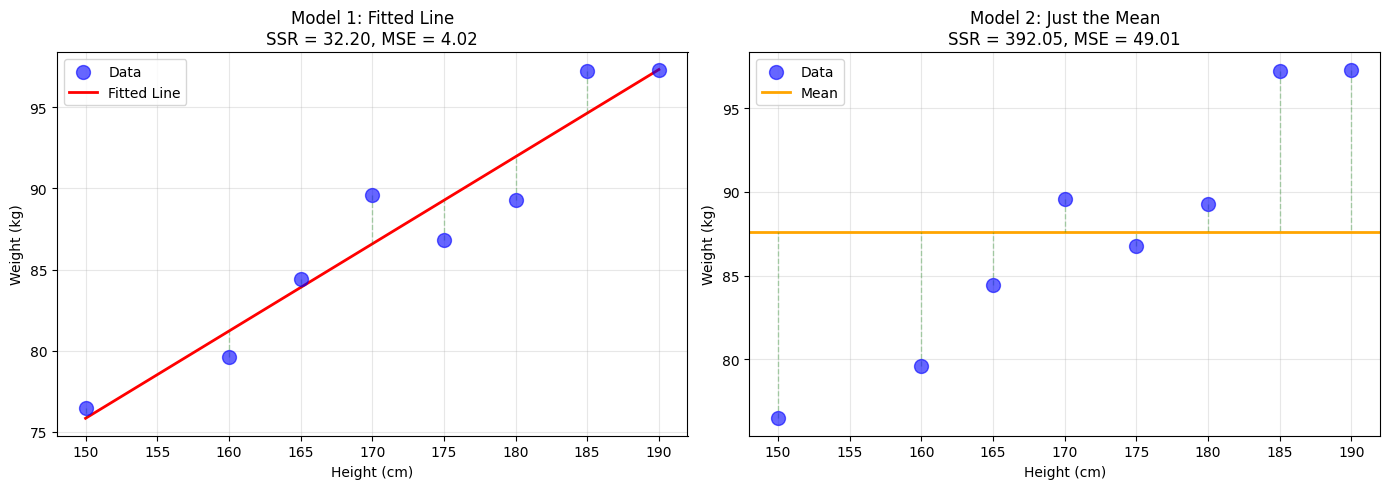

In [8]:
print("="*60)
print("SSR (Sum of Squared Residuals) & MSE")
print("="*60)

# Using data from previous section
print("\nCalculating SSR and MSE:\n")

print(f"{'Height':<10} {'Observed':<12} {'Predicted':<12} {'Residual':<12} {'Residual²':<12}")
print("-" * 65)

squared_residuals = []
for h, obs, pred, res in zip(heights, weights, predicted_weights, residuals):
    sq_res = res ** 2
    squared_residuals.append(sq_res)
    print(f"{h:<10.1f} {obs:<12.2f} {pred:<12.2f} {res:<12.2f} {sq_res:<12.2f}")

# Calculate SSR
SSR = np.sum(squared_residuals)
print(f"\n{'='*65}")
print(f"SSR (Sum of Squared Residuals) = {SSR:.2f}")

# Calculate MSE
n = len(heights)
MSE = SSR / n
print(f"MSE (Mean Squared Error) = SSR / n = {SSR:.2f} / {n} = {MSE:.2f}")

# Compare two models
print("\n" + "="*60)
print("COMPARING TWO MODELS")
print("="*60)

# Model 2: Just predict the mean (simplest model)
mean_weight = np.mean(weights)
predicted_mean = np.full(len(weights), mean_weight)
residuals_mean = weights - predicted_mean

SSR_mean = np.sum(residuals_mean ** 2)
MSE_mean = SSR_mean / n

print(f"\nModel 1 (Fitted Line):")
print(f"  SSR = {SSR:.2f}")
print(f"  MSE = {MSE:.2f}")

print(f"\nModel 2 (Just predict mean = {mean_weight:.2f}):")
print(f"  SSR = {SSR_mean:.2f}")
print(f"  MSE = {MSE_mean:.2f}")

print(f"\n✅ Lower SSR/MSE = Better model!")
print(f"   Model 1 wins! (SSR: {SSR:.2f} < {SSR_mean:.2f})")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Model 1
axes[0].scatter(heights, weights, s=100, color='blue', alpha=0.6, label='Data', zorder=3)
axes[0].plot(heights, predicted_weights, color='red', linewidth=2, label='Fitted Line', zorder=2)
for h, obs, pred in zip(heights, weights, predicted_weights):
    axes[0].plot([h, h], [obs, pred], 'g--', alpha=0.3, linewidth=1)
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Weight (kg)')
axes[0].set_title(f'Model 1: Fitted Line\nSSR = {SSR:.2f}, MSE = {MSE:.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Model 2
axes[1].scatter(heights, weights, s=100, color='blue', alpha=0.6, label='Data', zorder=3)
axes[1].axhline(mean_weight, color='orange', linewidth=2, label='Mean', zorder=2)
for h, obs in zip(heights, weights):
    axes[1].plot([h, h], [obs, mean_weight], 'g--', alpha=0.3, linewidth=1)
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Weight (kg)')
axes[1].set_title(f'Model 2: Just the Mean\nSSR = {SSR_mean:.2f}, MSE = {MSE_mean:.2f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. R-Squared (R²) - The Universal Score

**Problem**: SSR/MSE depend on units (meters vs millimeters)

**Solution**: R² compares your model to the simplest model (the mean)

**Formula**: $R^2 = \frac{SSR_{mean} - SSR_{line}}{SSR_{mean}}$

**Interpretation**:
- **R² = 0**: Your model is no better than guessing the mean
- **R² = 1**: Perfect predictions
- **R² < 0**: Your model is worse than the mean!

R-SQUARED (R²)

Using our model:

SSR (fitted line) = 32.20
SSR (mean) = 392.05

R² = (SSR_mean - SSR_line) / SSR_mean
   = (392.05 - 32.20) / 392.05
   = 0.9179

INTERPRETATION:
  R² = 0.9179 means our model explains 91.79% of the variation
  The remaining 8.21% is unexplained (noise)

DIFFERENT SCENARIOS


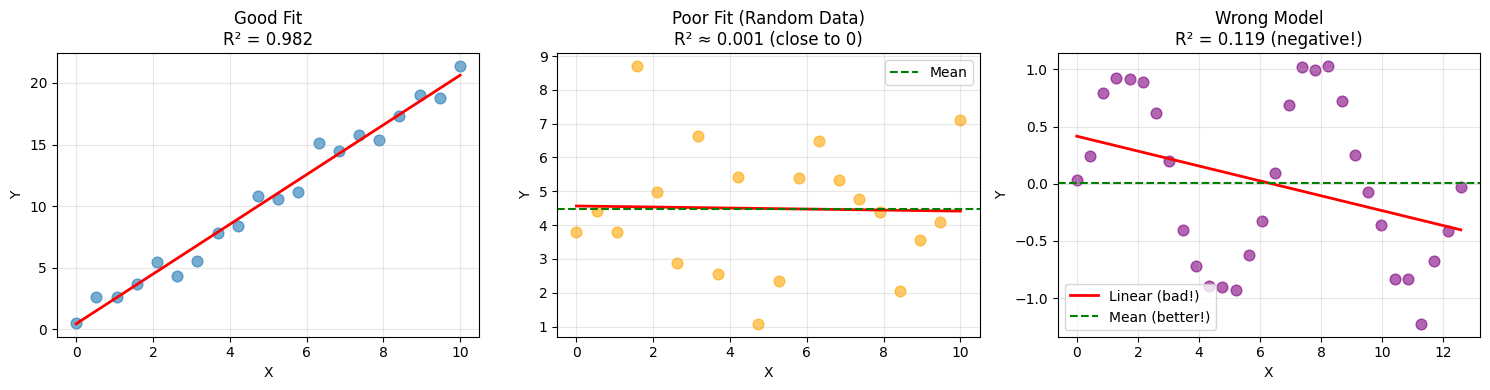


✅ R² SUMMARY:
   • R² = 1.0: Perfect fit
   • R² = 0.8-0.9: Very good fit
   • R² = 0.5-0.7: Moderate fit
   • R² ≈ 0: No better than mean
   • R² < 0: Worse than mean!


In [9]:
print("="*60)
print("R-SQUARED (R²)")
print("="*60)

# Calculate R²
print(f"\nUsing our model:\n")
print(f"SSR (fitted line) = {SSR:.2f}")
print(f"SSR (mean) = {SSR_mean:.2f}\n")

R_squared = (SSR_mean - SSR) / SSR_mean
print(f"R² = (SSR_mean - SSR_line) / SSR_mean")
print(f"   = ({SSR_mean:.2f} - {SSR:.2f}) / {SSR_mean:.2f}")
print(f"   = {R_squared:.4f}\n")

print(f"INTERPRETATION:")
print(f"  R² = {R_squared:.4f} means our model explains {R_squared*100:.2f}% of the variation")
print(f"  The remaining {(1-R_squared)*100:.2f}% is unexplained (noise)\n")

# Test different scenarios
print("="*60)
print("DIFFERENT SCENARIOS")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Scenario 1: Good fit
x1 = np.linspace(0, 10, 20)
y1 = 2*x1 + 1 + np.random.normal(0, 1, 20)
model1 = LinearRegression().fit(x1.reshape(-1, 1), y1)
y1_pred = model1.predict(x1.reshape(-1, 1))
r2_1 = 1 - (np.sum((y1 - y1_pred)**2) / np.sum((y1 - np.mean(y1))**2))

axes[0].scatter(x1, y1, alpha=0.6, s=60)
axes[0].plot(x1, y1_pred, 'r-', linewidth=2)
axes[0].set_title(f'Good Fit\nR² = {r2_1:.3f}')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].grid(True, alpha=0.3)

# Scenario 2: Bad fit (random data)
x2 = np.linspace(0, 10, 20)
y2 = np.random.normal(5, 2, 20)
model2 = LinearRegression().fit(x2.reshape(-1, 1), y2)
y2_pred = model2.predict(x2.reshape(-1, 1))
r2_2 = 1 - (np.sum((y2 - y2_pred)**2) / np.sum((y2 - np.mean(y2))**2))

axes[1].scatter(x2, y2, alpha=0.6, s=60, color='orange')
axes[1].plot(x2, y2_pred, 'r-', linewidth=2)
axes[1].axhline(np.mean(y2), color='green', linestyle='--', label='Mean')
axes[1].set_title(f'Poor Fit (Random Data)\nR² ≈ {r2_2:.3f} (close to 0)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# Scenario 3: Negative R² (wrong model for data)
x3 = np.linspace(0, 4*np.pi, 30)
y3 = np.sin(x3) + np.random.normal(0, 0.1, 30)
model3 = LinearRegression().fit(x3.reshape(-1, 1), y3)
y3_pred = model3.predict(x3.reshape(-1, 1))
r2_3 = 1 - (np.sum((y3 - y3_pred)**2) / np.sum((y3 - np.mean(y3))**2))

axes[2].scatter(x3, y3, alpha=0.6, s=60, color='purple')
axes[2].plot(x3, y3_pred, 'r-', linewidth=2, label='Linear (bad!)')
axes[2].axhline(np.mean(y3), color='green', linestyle='--', label='Mean (better!)')
axes[2].set_title(f'Wrong Model\nR² = {r2_3:.3f} (negative!)')
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"\n✅ R² SUMMARY:")
print(f"   • R² = 1.0: Perfect fit")
print(f"   • R² = 0.8-0.9: Very good fit")
print(f"   • R² = 0.5-0.7: Moderate fit")
print(f"   • R² ≈ 0: No better than mean")
print(f"   • R² < 0: Worse than mean!")

## 8. p-values: Is the Difference Real or Random?

**Goal**: Determine if a difference (Drug A vs Drug B) is real or just chance

**Common threshold**: p < 0.05 (5%)

**Interpretation**:
- **p < 0.05**: Statistically significant (difference is likely real)
- **p ≥ 0.05**: Not significant (could be random chance)

**Warning**: 
- Small p-value ≠ large effect (can have tiny difference with huge data)
- 5% threshold = 5% false positives are expected!

p-VALUES: Statistical Significance

EXAMPLE: Testing a new drug

Drug A (n=10): Recovery time = 123.90 days
Drug B (n=10): Recovery time = 111.50 days
Difference: 12.40 days

Statistical Test (t-test):
  t-statistic = 7.7669
  p-value = 0.0000

✅ p < 0.05: STATISTICALLY SIGNIFICANT
   The difference is likely REAL, not random chance!


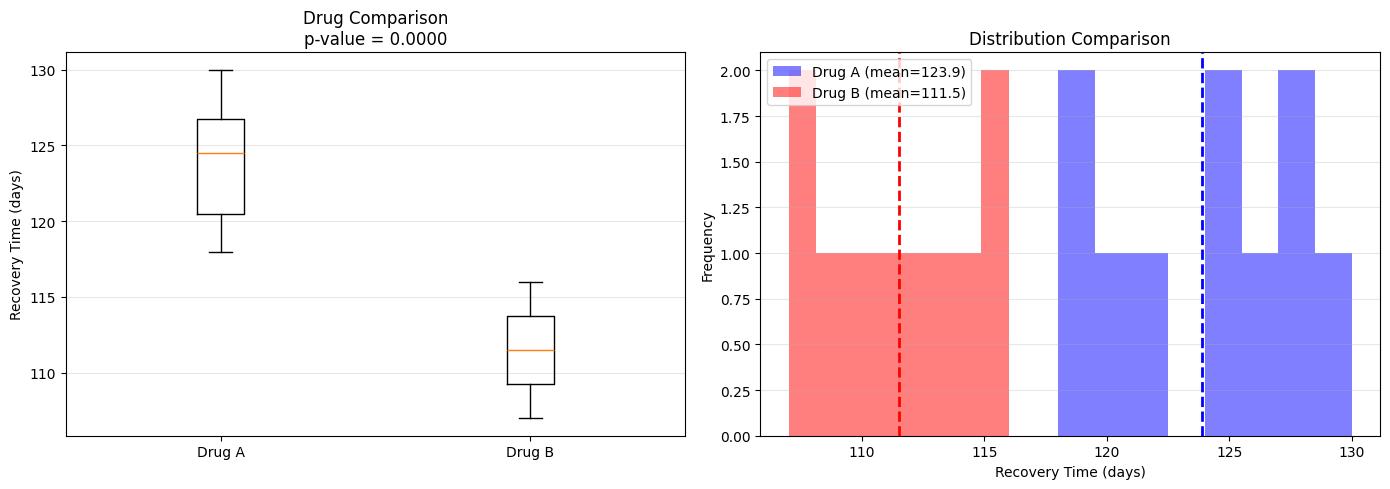


UNDERSTANDING FALSE POSITIVES

If we use p < 0.05 threshold:
  • We accept 5% false positive rate
  • Out of 100 random tests, ~5 will show 'significant' by chance
  • This is why we need:

    1. Multiple studies (replication)
    2. Effect size (is difference meaningful?)
    3. Proper experimental design

EXAMPLE: Small effect but large sample

Group 1: mean = 99.60
Group 2: mean = 100.58
Difference: 0.98 (very small!)
p-value = 0.025546 (very small!)

⚠️  LESSON:
   Small p-value (p=0.025546) confirms difference is REAL
   BUT difference is TINY (only 0.5 units)
   Statistical significance ≠ Practical importance!


In [10]:
print("="*60)
print("p-VALUES: Statistical Significance")
print("="*60)

# Example: Drug trial
print("\nEXAMPLE: Testing a new drug\n")

# Drug A results
drug_a = np.array([120, 125, 118, 130, 122, 128, 124, 126, 119, 127])
# Drug B results  
drug_b = np.array([110, 115, 108, 112, 111, 114, 109, 113, 107, 116])

print(f"Drug A (n={len(drug_a)}): Recovery time = {np.mean(drug_a):.2f} days")
print(f"Drug B (n={len(drug_b)}): Recovery time = {np.mean(drug_b):.2f} days")
print(f"Difference: {np.mean(drug_a) - np.mean(drug_b):.2f} days\n")

# Perform t-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(drug_a, drug_b)

print(f"Statistical Test (t-test):")
print(f"  t-statistic = {t_stat:.4f}")
print(f"  p-value = {p_value:.4f}\n")

if p_value < 0.05:
    print(f"✅ p < 0.05: STATISTICALLY SIGNIFICANT")
    print(f"   The difference is likely REAL, not random chance!")
else:
    print(f"❌ p ≥ 0.05: NOT significant")
    print(f"   Could be random chance.")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
axes[0].boxplot([drug_a, drug_b], labels=['Drug A', 'Drug B'])
axes[0].set_ylabel('Recovery Time (days)')
axes[0].set_title(f'Drug Comparison\np-value = {p_value:.4f}')
axes[0].grid(True, alpha=0.3, axis='y')

# Distribution
axes[1].hist(drug_a, alpha=0.5, label=f'Drug A (mean={np.mean(drug_a):.1f})', bins=8, color='blue')
axes[1].hist(drug_b, alpha=0.5, label=f'Drug B (mean={np.mean(drug_b):.1f})', bins=8, color='red')
axes[1].axvline(np.mean(drug_a), color='blue', linestyle='--', linewidth=2)
axes[1].axvline(np.mean(drug_b), color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Recovery Time (days)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Show false positive concept
print("\n" + "="*60)
print("UNDERSTANDING FALSE POSITIVES")
print("="*60)
print(f"\nIf we use p < 0.05 threshold:")
print(f"  • We accept 5% false positive rate")
print(f"  • Out of 100 random tests, ~5 will show 'significant' by chance")
print(f"  • This is why we need:\n")
print(f"    1. Multiple studies (replication)")
print(f"    2. Effect size (is difference meaningful?)")
print(f"    3. Proper experimental design\n")

# Example: Small effect, large sample
print("EXAMPLE: Small effect but large sample\n")

np.random.seed(123)
group1_large = np.random.normal(100, 10, 1000)  # 1000 samples
group2_large = np.random.normal(100.5, 10, 1000)  # Tiny difference (0.5)

t_stat_large, p_value_large = ttest_ind(group1_large, group2_large)

print(f"Group 1: mean = {np.mean(group1_large):.2f}")
print(f"Group 2: mean = {np.mean(group2_large):.2f}")
print(f"Difference: {np.mean(group2_large) - np.mean(group1_large):.2f} (very small!)")
print(f"p-value = {p_value_large:.6f} (very small!)\n")

print(f"⚠️  LESSON:")
print(f"   Small p-value (p={p_value_large:.6f}) confirms difference is REAL")
print(f"   BUT difference is TINY (only 0.5 units)")
print(f"   Statistical significance ≠ Practical importance!")

## 9. Chapter 3 Summary

In [11]:
print("\n" + "="*70)
print("CHAPTER 3 SUMMARY: Statistical Foundations")
print("="*70)

print("""
┌──────────────────────────────────────────────────────────────────┐
│ 1. HISTOGRAMS & PROBABILITY                                      │
├──────────────────────────────────────────────────────────────────┤
│ • Stack data into bins to see patterns                           │
│ • P(bin) = observations in bin / total observations              │
│ • Weakness: Sensitive to bin width, can't predict gaps           │
└──────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────┐
│ 2. DISCRETE DISTRIBUTIONS                                         │
├──────────────────────────────────────────────────────────────────┤
│ BINOMIAL: Binary outcomes (Yes/No, Heads/Tails)                  │
│   Formula: P(X=x) = C(n,x) × p^x × (1-p)^(n-x)                   │
│   Parameters: n (trials), p (success probability), x (successes) │
│                                                                   │
│ POISSON: Counts over time/space (pages/hour, emails/day)         │
│   Formula: P(X=x) = (λ^x × e^(-λ)) / x!                          │
│   Parameter: λ (lambda) = average rate                           │
└──────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────┐
│ 3. CONTINUOUS DISTRIBUTIONS                                       │
├──────────────────────────────────────────────────────────────────┤
│ NORMAL: Bell curve (height, test scores)                         │
│   Parameters: μ (mean), σ (standard deviation)                   │
│   Y-axis = LIKELIHOOD (not probability!)                         │
│   Probability = Area under curve between two points              │
│                                                                   │
│ EXPONENTIAL: Time between events                                 │
│ UNIFORM: All values equally likely (random numbers)              │
└──────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────┐
│ 4. MODELS & RESIDUALS                                             │
├──────────────────────────────────────────────────────────────────┤
│ Model: Approximation of reality (like a line)                    │
│ Residual = Observed - Predicted                                  │
│   • Positive residual: Model underestimated                      │
│   • Negative residual: Model overestimated                       │
└──────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────┐
│ 5. MEASURING GOODNESS                                             │
├──────────────────────────────────────────────────────────────────┤
│ SSR (Sum of Squared Residuals):                                  │
│   SSR = Σ(Observed - Predicted)²                                 │
│   • Square to make positive                                      │
│   • Penalizes large errors more                                  │
│                                                                   │
│ MSE (Mean Squared Error):                                        │
│   MSE = SSR / n                                                  │
│   • Average error                                                │
│   • Allows comparison across datasets                            │
│                                                                   │
│ Lower SSR/MSE = Better model ✓                                   │
└──────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────┐
│ 6. R-SQUARED (R²)                                                 │
├──────────────────────────────────────────────────────────────────┤
│ Formula: R² = (SSR_mean - SSR_line) / SSR_mean                   │
│                                                                   │
│ Interpretation:                                                  │
│   • R² = 1.0: Perfect predictions                                │
│   • R² = 0.8-0.9: Very good                                      │
│   • R² = 0.5-0.7: Moderate                                       │
│   • R² ≈ 0: No better than mean                                  │
│   • R² < 0: Worse than mean!                                     │
│                                                                   │
│ Benefit: Unit-independent (works across all scales)              │
└──────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────┐
│ 7. p-VALUES                                                       │
├──────────────────────────────────────────────────────────────────┤
│ Question: Is the difference real or random chance?               │
│                                                                   │
│ Threshold: p < 0.05 (5%)                                         │
│   • p < 0.05: Statistically significant (likely real)            │
│   • p ≥ 0.05: Not significant (could be chance)                  │
│                                                                   │
│ WARNINGS:                                                        │
│   ⚠️  5% threshold = 5% false positives expected                 │
│   ⚠️  Small p-value ≠ large effect                               │
│   ⚠️  Can have tiny difference with huge sample → tiny p-value   │
│   ⚠️  Statistical significance ≠ Practical importance            │
└──────────────────────────────────────────────────────────────────┘

✅ KEY TAKEAWAYS:
   • Use distributions to model data (no more gaps!)
   • Discrete: Binomial (binary), Poisson (counts)
   • Continuous: Normal (bell curve), y-axis = likelihood
   • Residuals measure prediction errors
   • SSR/MSE quantify total error
   • R² is universal score (0 to 1)
   • p-values test if differences are real
   • Always consider both statistical AND practical significance
""")

print("="*70)


CHAPTER 3 SUMMARY: Statistical Foundations

┌──────────────────────────────────────────────────────────────────┐
│ 1. HISTOGRAMS & PROBABILITY                                      │
├──────────────────────────────────────────────────────────────────┤
│ • Stack data into bins to see patterns                           │
│ • P(bin) = observations in bin / total observations              │
│ • Weakness: Sensitive to bin width, can't predict gaps           │
└──────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────┐
│ 2. DISCRETE DISTRIBUTIONS                                         │
├──────────────────────────────────────────────────────────────────┤
│ BINOMIAL: Binary outcomes (Yes/No, Heads/Tails)                  │
│   Formula: P(X=x) = C(n,x) × p^x × (1-p)^(n-x)                   │
│   Parameters: n (trials), p (success probability), x (successes) │
│                                                       